<a href="https://colab.research.google.com/github/yakamurii/Desafio_An-lise-de-dados-v2-ciencia_dados.ipynb/blob/main/Desafio_An%C3%A1lise_de_dados_v2_ciencia_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Desafio Dom Rock#


##Sequência de Etapas##



###Instalando Biblioteca Prophet###

In [ ]:
!pip install prophet

### Importando Bibliotecas ###

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from prophet import Prophet

###Obtenção dos dados da API###

In [ ]:
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.24363/dados?formato=json"
response = requests.get(url)
if response.status_code == 200:
    dados = response.json()
    dados = pd.DataFrame(dados)
else:
    print("Erro ao obter os dados da API.")

dados.head()

,data,valor
0,01/01/2003,96.15
1,01/02/2003,98.67
2,01/03/2003,103.41
3,01/04/2003,102.19
4,01/05/2003,100.30


### Ajustando da Data###

In [ ]:
dados['data'] = pd.to_datetime(dados['data'], dayfirst=True)
dados

,data,valor
0,2003-01-01,96.15
1,2003-02-01,98.67
2,2003-03-01,103.41
3,2003-04-01,102.19
4,2003-05-01,100.30
...,...,...
248,2023-09-01,144.91
249,2023-10-01,145.09
250,2023-11-01,144.31
251,2023-12-01,144.10


### Convertendo a coluna "valor" para um valor do tipo float, porque ele estava como String no Dataframe ###

In [ ]:
dados['valor'] = dados['valor'].astype(float)
dados

,data,valor
0,2003-01-01,96.15
1,2003-02-01,98.67
2,2003-03-01,103.41
3,2003-04-01,102.19
4,2003-05-01,100.30
...,...,...
248,2023-09-01,144.91
249,2023-10-01,145.09
250,2023-11-01,144.31
251,2023-12-01,144.10


### Mudando o nome das colunas ###

In [ ]:
dados.columns = ["ds", "y"]
dados

,ds,y
0,2003-01-01,96.15
1,2003-02-01,98.67
2,2003-03-01,103.41
3,2003-04-01,102.19
4,2003-05-01,100.30
...,...,...
248,2023-09-01,144.91
249,2023-10-01,145.09
250,2023-11-01,144.31
251,2023-12-01,144.10


###Filtrando os dados dos últimos 5 anos###

In [ ]:
cinco_anos_atras = pd.Timestamp.now() - pd.DateOffset(years=5)
df_ultimos_cinco_anos = dados[dados['ds'] >= cinco_anos_atras]
df_ultimos_cinco_anos

,ds,y
196,2019-05-01,139.54
197,2019-06-01,135.25
198,2019-07-01,143.27
199,2019-08-01,142.06
200,2019-09-01,138.43
201,2019-10-01,143.06
202,2019-11-01,139.02
203,2019-12-01,137.55
204,2020-01-01,134.02
205,2020-02-01,134.46


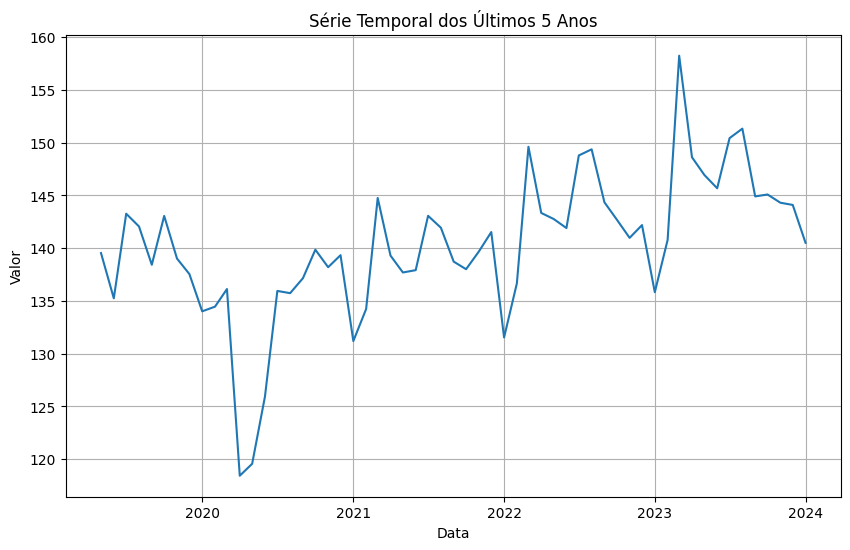

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_ultimos_cinco_anos['ds'], df_ultimos_cinco_anos['y'], linestyle='-')
plt.title('Série Temporal dos Últimos 5 Anos')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

###Criando e Treinando o Modelo ###

In [ ]:
modelo = Prophet()
modelo.fit(df_ultimos_cinco_anos)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxazr9l5/tm5_dz42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxazr9l5/0sz_0lcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35205', 'data', 'file=/tmp/tmpdxazr9l5/tm5_dz42.json', 'init=/tmp/tmpdxazr9l5/0sz_0lcj.json', 'output', 'file=/tmp/tmpdxazr9l5/prophet_model4bk22uf0/prophet_model-20240415170841.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:08:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:08:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Prevendo os próximos períodos###

In [ ]:
datas_futuras = modelo.make_future_dataframe(periods=12, freq='MS')
datas_futuras.tail()

,ds
64,2024-09-01
65,2024-10-01
66,2024-11-01
67,2024-12-01
68,2025-01-01


In [ ]:
datas_futuras = datas_futuras[datas_futuras['ds'] > pd.Timestamp.now()]
datas_futuras

,ds
60,2024-05-01
61,2024-06-01
62,2024-07-01
63,2024-08-01
64,2024-09-01
65,2024-10-01
66,2024-11-01
67,2024-12-01
68,2025-01-01


In [ ]:
previsao = modelo.predict(datas_futuras)
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4,2024-09-01,150.457478,145.933646,154.880981
5,2024-10-01,149.841389,145.606616,154.462691
6,2024-11-01,149.246491,144.951046,153.564122
7,2024-12-01,151.728871,147.550789,155.903010
8,2025-01-01,143.413567,138.813715,147.623794


###Visualização dos Dados###

####(Não consegui adaptar o gráfico para representar uma linha suave.)####

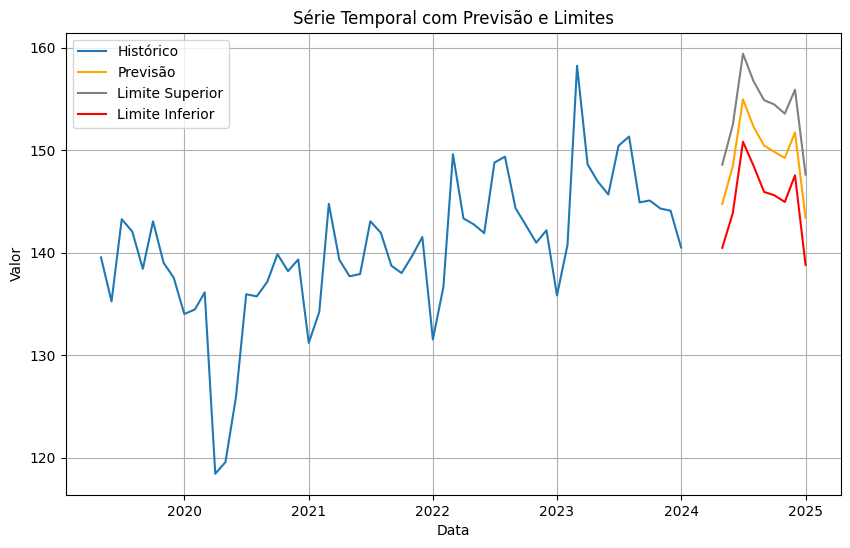

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_ultimos_cinco_anos['ds'], df_ultimos_cinco_anos['y'], linestyle='-', label='Histórico')

plt.plot(previsao['ds'], previsao['yhat'], linestyle='-', color='orange', label='Previsão')


plt.plot(previsao['ds'], previsao['yhat_upper'], linestyle='-', color='gray', label='Limite Superior')
plt.plot(previsao['ds'], previsao['yhat_lower'], linestyle='-', color='red', label='Limite Inferior')

plt.title('Série Temporal com Previsão e Limites')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.show()

##Resultados: abordagem utilizada e análise dos resultados obtidos##

A abordagem utilizada neste projeto de ciência de dados consistiu na coleta dos dados públicos do indicador de atividade econômica produzido e liberado pelo Banco Central, diretamente do endereço online fornecido, sem a necessidade de download manual. Os dados foram então preparados, ajustando o tipo do campo de data para datetime e do valor para float. Em seguida, foi realizada uma análise exploratória inicial dos dados, destacando padrões temporais e tendências históricas.


Para modelar a série temporal, foi empregada a biblioteca Prophet, uma ferramenta de previsão de séries temporais desenvolvida pelo Facebook. O modelo Prophet foi treinado com os dados dos últimos cinco anos e utilizado para fazer previsões futuras do indicador de atividade econômica para os próximos meses.


Os resultados da previsão foram visualizados em um gráfico que inclui tanto os dados históricos como a previsão futura, juntamente com os limites superior e inferior da previsão. A análise dos resultados mostra que o modelo foi capaz de capturar as tendências subjacentes nos dados históricos e fornecer previsões razoáveis para o comportamento futuro do indicador de atividade econômica.


A escolha do modelo Prophet se justifica pela sua capacidade de lidar com sazonalidades, feriados e tendências não lineares com facilidade, tornando-o adequado para modelagem de séries temporais com padrões complexos. Além disso, sua facilidade de uso e interpretabilidade o tornam uma escolha prática para projetos de ciência de dados com foco em previsão de séries temporais, como neste caso.

